## Week 3_11 Linear Regressions

Now that we went through spatial weights and autocorrelation, it's time to look into spatial regression. Before we do that though, let's refresh our memory on linear regressions and make sure that we know how to do regression analysis. 

### Let's go straight into practice 

</figure>
<img src="https://images.axios.com/o13A3BkhiJo0ufUjoCnVT3vQ02U=/0x625:6000x4000/1920x1080/2022/07/24/1658705447535.jpg?w=1920" alt="drawing" width="600" style="display: block; margin: 0 auto"/>
<figcaption> California Wildfire and Smokey Bear </figcaption>


Recently, California has been experiencing a huge surge of wild fires, threatening families, homes and the natural environment. Even worse, insurance companies have started to increase their premiumns, or even decided to move out of California because they were incurring high costs to operate. With more homeowners left unprotected, there is increasing fear on wildfires and fear of extreme climates/natural disasters. This research stems from the question 'Are insurance companies actually pulling out of areas with higher risk of wildfire, or are there underlying socio-economic phenomena that would drive insurance companies to avoid certain zip codes?

### Objective 
Our goals of this exercise is to see the correlation between insurance companies pulling out and wildfire risk and socio-demographic features of zip-codes in California. In the perspective of rational agents in the market economy, insurance companies should be pulling out in areas that have higher wildfire risk. If not, there must be other patterns that are going on, incentivizing insurance companies to move out of the area. 


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
path = os.getcwd()
path

'/Users/yujinlee/Documents/Summer 2024/CRP3850/Week3_11'

### Data Management and Cleaning

For many research projects, data cleaning and management will take around 80% of your time, and the other 20% will probably be used to actually run regressions and analyze results. Data processing can be time consuming, but is the most important step if you really want to create meaningful results! Make sure you know that kind of data you are working with and you understand all variables you are using :) 

There are three data sets that I want to bring in
1. **zip** - has zip code level geometry
2. **california environmental data** - has socio-demographic information and geometry
3. **wildfire risk indexes** - has information on risk index and number of wildfire occurences
4. **insurance company data** - has information on whether the insurer or insured did not renew their contract

In [3]:
## Bring in all the data sets
cali = pd.read_excel(path + '/cali.xlsx')
zip = gpd.read_file(path + '/ZipCodes.zip')
risk = pd.read_excel(path + '/Wildfire_2021.xlsx', sheet_name = '2021HO')
insurance = pd.read_excel(path + '/insurance.xlsx')

In [4]:
zip.dtypes

ZIP_CODE        object
PO_NAME         object
STATE           object
POPULATION       int64
POP_SQMI       float64
SQMI           float64
geometry      geometry
dtype: object

In [5]:
zip['ZIP_CODE'] = zip['ZIP_CODE'].astype(int)

In [6]:
cali.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019005605,1745,Fresno,93710,Fresno,-119.732754,36.830307,18.612311,34.253656,30-35%,...,11.273515,20.7,35.753769,8.6,78.969287,0.8,0.012674,29.822972,3.093611,19.755421
1,6071002038,6890,San Bernardino,92336,Fontana,-117.495486,34.113932,20.540929,38.867877,35-40%,...,23.765056,15.9,24.170854,5.1,45.783446,1.6,0.038023,40.099293,4.159600,35.501765
2,6013355117,7292,Contra Costa,94582,Unincorporated Contra Costa County area,-121.896850,37.746037,4.189989,1.828038,1-5% (lowest scores),...,42.806875,3.4,0.452261,3.1,18.310776,1.6,0.038023,23.739742,2.462583,11.838124
3,6037670702,5649,Los Angeles,90275,Rancho Palos Verdes,-118.328443,33.753600,3.526703,1.021180,1-5% (lowest scores),...,36.459602,3.9,0.628141,1.7,4.229568,1.7,0.050697,8.841119,0.917111,0.693394
4,6073020902,2235,San Diego,91916,Unincorporated San Diego County area,-116.606704,32.942484,10.170709,13.363591,10-15%,...,0.000000,13.4,18.178392,6.3,60.567413,1.9,0.076046,27.648088,2.868005,16.767524


In [7]:
cali.dtypes

Census Tract                     int64
Total Population                 int64
California County               object
ZIP                              int64
Approximate Location            object
Longitude                      float64
Latitude                       float64
CES 4.0 Score                  float64
CES 4.0 Percentile             float64
CES 4.0 Percentile Range        object
Ozone                          float64
Ozone Pctl                     float64
PM2.5                          float64
PM2.5 Pctl                     float64
Diesel PM                      float64
Diesel PM Pctl                 float64
Drinking Water                 float64
Drinking Water Pctl            float64
Lead                           float64
Lead Pctl                      float64
Pesticides                     float64
Pesticides Pctl                float64
Tox. Release                   float64
Tox. Release Pctl              float64
Traffic                        float64
Traffic Pctl             

In [8]:
## let me take out variables that I'm interested in for the socio-economic status

cali = cali[['ZIP', 'Education', 'Poverty', 'Unemployment',  'Housing Burden', 'Linguistic Isolation',
       'Ozone', 'PM2.5']]

In [9]:
cali = cali.dropna()

In [10]:
cali= cali.groupby(by ='ZIP').mean()

In [11]:
zip_cali = zip.merge(cali, left_on = 'ZIP_CODE', right_on = 'ZIP')
zip_cali.dtypes

ZIP_CODE                   int64
PO_NAME                   object
STATE                     object
POPULATION                 int64
POP_SQMI                 float64
SQMI                     float64
geometry                geometry
Education                float64
Poverty                  float64
Unemployment             float64
Housing Burden           float64
Linguistic Isolation     float64
Ozone                    float64
PM2.5                    float64
dtype: object

California has a total of 1,766 active zip codes but I'm not going to worry about it for now. For the purporse of this assignment, the number of zip codes won't matter and I'm also satisfied with the sample size of 1353. Now let's finish the rest of the merging.

In [12]:
##looking at the dataframe columns, we can see that there are a lot of interesting variables such as risk exposure, incurred losse

risk.columns

Index(['ZIP Code', 'Cov A Amount Weighted Avg', 'Cov C Amount Weighted Avg',
       'Avg Fire Risk Score', 'Number of Negligible Fire Risk Exposure',
       'Number of Low Fire Risk Exposure',
       'Number of Moderate Fire Risk Exposure',
       'Number of High Fire Risk Exposure',
       'Number of Very High Fire Risk Exposure', 'Earned Premium',
       'Earned Exposure', 'Non-CAT\nCov A Fire - \nIncurred Losses',
       'Non-CAT\nCov A Fire - \nNumber of Claims',
       'Non-CAT\nCov A Smoke - \nIncurred Losses',
       'Non-CAT\nCov A Smoke - \nNumber of Claims',
       'Non-CAT\nCov C Fire - \nIncurred Losses',
       'Non-CAT\nCov C Fire - \nNumber of Claims',
       'Non-CAT\nCov C Smoke - \nIncurred Losses',
       'Non-CAT\nCov C Smoke - \nNumber of Claims',
       'CAT\nCov A Fire - \nIncurred Losses',
       'CAT\nCov A Fire - \nNumber of Claims',
       'CAT\nCov A Smoke - \nIncurred Losses',
       'CAT\nCov A Smoke - \nNumber of Claims',
       'CAT\nCov C Fire - \nIncur

In [13]:
risk.shape

(2118, 27)

In [14]:
## we already know that I'm not going to need all of these columns so let's create a new dataframe with only the variables that show risk and maybe earned premium?

risk = risk[['ZIP Code', 'Avg Fire Risk Score', 'Number of Negligible Fire Risk Exposure',
       'Number of Low Fire Risk Exposure',
       'Number of Moderate Fire Risk Exposure',
       'Number of High Fire Risk Exposure',
       'Number of Very High Fire Risk Exposure', 'Earned Premium']]

risk.head()

,ZIP Code,Avg Fire Risk Score,Number of Negligible Fire Risk Exposure,Number of Low Fire Risk Exposure,Number of Moderate Fire Risk Exposure,Number of High Fire Risk Exposure,Number of Very High Fire Risk Exposure,Earned Premium
0,90001,0.35,875,469,0,1,0,1076066
1,90002,0.35,1265,674,0,0,0,1523488
2,90003,0.34,1167,601,1,0,0,1537173
3,90004,0.55,814,794,67,0,0,4428387
4,90005,0.51,198,166,15,0,0,1377640


In [15]:
risk.dtypes

ZIP Code                                     int64
Avg Fire Risk Score                        float64
Number of Negligible Fire Risk Exposure      int64
Number of Low Fire Risk Exposure             int64
Number of Moderate Fire Risk Exposure        int64
Number of High Fire Risk Exposure            int64
Number of Very High Fire Risk Exposure       int64
Earned Premium                               int64
dtype: object

In [16]:
## let's merge the two data sets together 

calirisk = zip_cali.merge(risk, left_on = 'ZIP_CODE', right_on = 'ZIP Code')
calirisk

,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,geometry,Education,Poverty,Unemployment,...,Ozone,PM2.5,ZIP Code,Avg Fire Risk Score,Number of Negligible Fire Risk Exposure,Number of Low Fire Risk Exposure,Number of Moderate Fire Risk Exposure,Number of High Fire Risk Exposure,Number of Very High Fire Risk Exposure,Earned Premium
0,90001,Los Angeles,CA,59907,16970.82,3.53,"POLYGON ((532456.173 7660538.070, 531871.206 7...",51.656250,59.625000,8.500000,...,0.044953,12.126347,90001,0.35,875,469,0,1,0,1076066
1,90002,Los Angeles,CA,53573,17281.61,3.10,"POLYGON ((536465.606 7649213.814, 536402.561 7...",48.858333,63.575000,10.458333,...,0.044129,12.074751,90002,0.35,1265,674,0,0,0,1523488
2,90003,Los Angeles,CA,71967,20503.42,3.51,"POLYGON ((525864.950 7660430.160, 524538.359 7...",48.240000,64.760000,8.850000,...,0.044193,12.110824,90003,0.34,1167,601,1,0,0,1537173
3,90004,Los Angeles,CA,63987,20508.65,3.12,"POLYGON ((519399.531 7694652.300, 511930.782 7...",26.188235,47.382353,4.464706,...,0.047899,12.058694,90004,0.55,814,794,67,0,0,4428387
4,90005,Los Angeles,CA,41844,26823.08,1.56,"POLYGON ((519577.715 7687417.247, 511693.235 7...",30.671429,54.142857,6.357143,...,0.046937,12.105165,90005,0.51,198,166,15,0,0,1377640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,96124,Calpine,CA,321,1.76,182.74,"POLYGON ((-104436.684 9740594.357, -108531.216...",7.600000,31.700000,5.300000,...,0.053868,6.421772,96124,2.38,0,7,53,45,1,183769
1276,96130,Susanville,CA,21704,25.69,844.82,"POLYGON ((-81757.323 10099662.990, -85127.869 ...",3.150000,27.000000,3.100000,...,0.048278,5.023059,96130,1.36,436,1074,860,220,25,3681778
1277,96143,Kings Beach,CA,4086,225.50,18.12,"POLYGON ((-1504.030 9597407.396, -10305.476 95...",8.900000,39.900000,1.400000,...,0.049788,5.861122,96143,2.42,5,146,131,343,47,1260460
1278,96150,South Lake Tahoe,CA,32999,151.87,217.28,"POLYGON ((14322.233 9469012.916, -288.136 9481...",9.875000,30.050000,6.450000,...,0.050009,4.212495,96150,2.12,268,932,4697,2153,162,14546763


In [17]:
insurance = insurance[insurance['Year']==2020]
insurance.head()

,County,ZIP Code,Year,New,Renewed,Insured-Initiated Nonrenewed,Insurer-Initiated Nonrenewed
11258,NaN,78681,2020,0,0,1,0
11259,NaN,85670,2020,1,0,1,0
11260,Los Angeles,90001,2020,813,5539,467,306
11261,Los Angeles,90002,2020,860,5509,536,242
11262,Los Angeles,90003,2020,1127,6824,687,289


In [18]:
df_f = pd.merge(calirisk, insurance, left_on = 'ZIP Code', right_on = 'ZIP Code')

In [19]:
df_f.head()

,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,geometry,Education,Poverty,Unemployment,...,Number of Moderate Fire Risk Exposure,Number of High Fire Risk Exposure,Number of Very High Fire Risk Exposure,Earned Premium,County,Year,New,Renewed,Insured-Initiated Nonrenewed,Insurer-Initiated Nonrenewed
0,90001,Los Angeles,CA,59907,16970.82,3.53,"POLYGON ((532456.173 7660538.070, 531871.206 7...",51.656250,59.625000,8.500000,...,0,1,0,1076066,Los Angeles,2020,813,5539,467,306
1,90002,Los Angeles,CA,53573,17281.61,3.10,"POLYGON ((536465.606 7649213.814, 536402.561 7...",48.858333,63.575000,10.458333,...,0,0,0,1523488,Los Angeles,2020,860,5509,536,242
2,90003,Los Angeles,CA,71967,20503.42,3.51,"POLYGON ((525864.950 7660430.160, 524538.359 7...",48.240000,64.760000,8.850000,...,1,0,0,1537173,Los Angeles,2020,1127,6824,687,289
3,90004,Los Angeles,CA,63987,20508.65,3.12,"POLYGON ((519399.531 7694652.300, 511930.782 7...",26.188235,47.382353,4.464706,...,67,0,0,4428387,Los Angeles,2020,540,3917,429,105
4,90005,Los Angeles,CA,41844,26823.08,1.56,"POLYGON ((519577.715 7687417.247, 511693.235 7...",30.671429,54.142857,6.357143,...,15,0,0,1377640,Los Angeles,2020,124,850,92,30


### Data Visualization - Recap


In [20]:
## Let's change the dataframe into a geodataframe first though

df = gpd.GeoDataFrame(
    df_f, 
    geometry = 'geometry',
    crs = "EPSG:3857")

/Users/yujinlee/anaconda3/envs/gds_py/lib/python3.9/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


Text(0.5, 1.0, 'Insurer Initiated Insurance Cancellations')

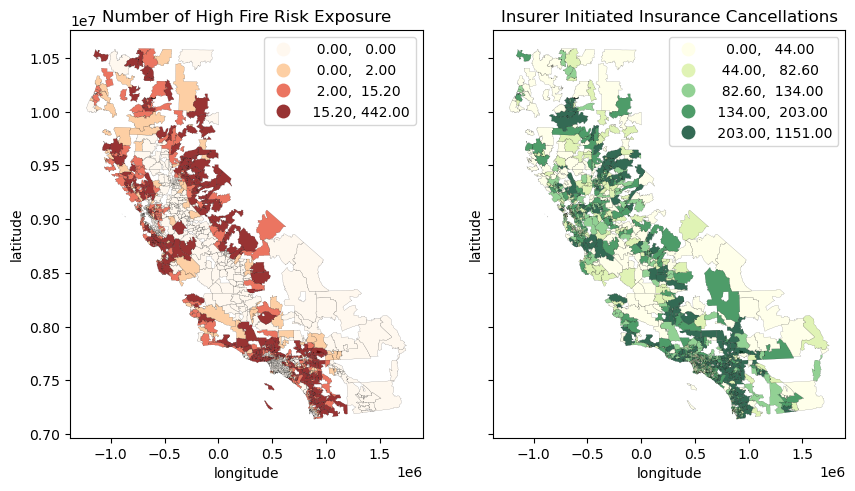

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,10), sharey = True)

df.plot(
    column = 'Number of Very High Fire Risk Exposure',
    cmap = 'OrRd',
    alpha = 0.8,
    scheme = 'quantiles',
    k=5,
    ax=ax[0],
    legend = True,
    edgecolor ='black',
    linewidth = 0.1
)

df.plot(
    column = 'Insurer-Initiated Nonrenewed',
    cmap = 'YlGn',
    alpha = 0.8,
    scheme = 'quantiles',
    k=5,
    ax=ax[1],
    legend = True,
    edgecolor ='black',
    linewidth = 0.1
)

ax[0].set_xlabel("longitude")
ax[0].set_ylabel("latitude")
ax[0].set_title("Number of High Fire Risk Exposure")

ax[1].set_xlabel("longitude")
ax[1].set_ylabel("latitude")
ax[1].set_title("Insurer Initiated Insurance Cancellations")

### Let's take a look at the final data set again 
I probably won't need all of the columns but maybe I want to include some variables as controls so I'll leave columns for now.

In [22]:
df.columns

Index(['ZIP_CODE', 'PO_NAME', 'STATE', 'POPULATION', 'POP_SQMI', 'SQMI',
       'geometry', 'Education', 'Poverty', 'Unemployment', 'Housing Burden',
       'Linguistic Isolation', 'Ozone', 'PM2.5', 'ZIP Code',
       'Avg Fire Risk Score', 'Number of Negligible Fire Risk Exposure',
       'Number of Low Fire Risk Exposure',
       'Number of Moderate Fire Risk Exposure',
       'Number of High Fire Risk Exposure',
       'Number of Very High Fire Risk Exposure', 'Earned Premium', 'County',
       'Year', 'New', 'Renewed', 'Insured-Initiated Nonrenewed',
       'Insurer-Initiated Nonrenewed'],
      dtype='object')

In [23]:
df.head()

,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,geometry,Education,Poverty,Unemployment,...,Number of Moderate Fire Risk Exposure,Number of High Fire Risk Exposure,Number of Very High Fire Risk Exposure,Earned Premium,County,Year,New,Renewed,Insured-Initiated Nonrenewed,Insurer-Initiated Nonrenewed
0,90001,Los Angeles,CA,59907,16970.82,3.53,"POLYGON ((532456.173 7660538.070, 531871.206 7...",51.656250,59.625000,8.500000,...,0,1,0,1076066,Los Angeles,2020,813,5539,467,306
1,90002,Los Angeles,CA,53573,17281.61,3.10,"POLYGON ((536465.606 7649213.814, 536402.561 7...",48.858333,63.575000,10.458333,...,0,0,0,1523488,Los Angeles,2020,860,5509,536,242
2,90003,Los Angeles,CA,71967,20503.42,3.51,"POLYGON ((525864.950 7660430.160, 524538.359 7...",48.240000,64.760000,8.850000,...,1,0,0,1537173,Los Angeles,2020,1127,6824,687,289
3,90004,Los Angeles,CA,63987,20508.65,3.12,"POLYGON ((519399.531 7694652.300, 511930.782 7...",26.188235,47.382353,4.464706,...,67,0,0,4428387,Los Angeles,2020,540,3917,429,105
4,90005,Los Angeles,CA,41844,26823.08,1.56,"POLYGON ((519577.715 7687417.247, 511693.235 7...",30.671429,54.142857,6.357143,...,15,0,0,1377640,Los Angeles,2020,124,850,92,30


### Linear Regressions

Let's say that I was interested in the correlation between the number of insurance companies pulling out and `` (i) number of high risk wild fires``, ``(ii) population density``, and ``(iii) percentage of population experiencing housing burden``. Housing burden is generally defined as households who spend more than 30% of household income on housing costs.

<Axes: xlabel='Housing Burden', ylabel='Insurer-Initiated Nonrenewed'>

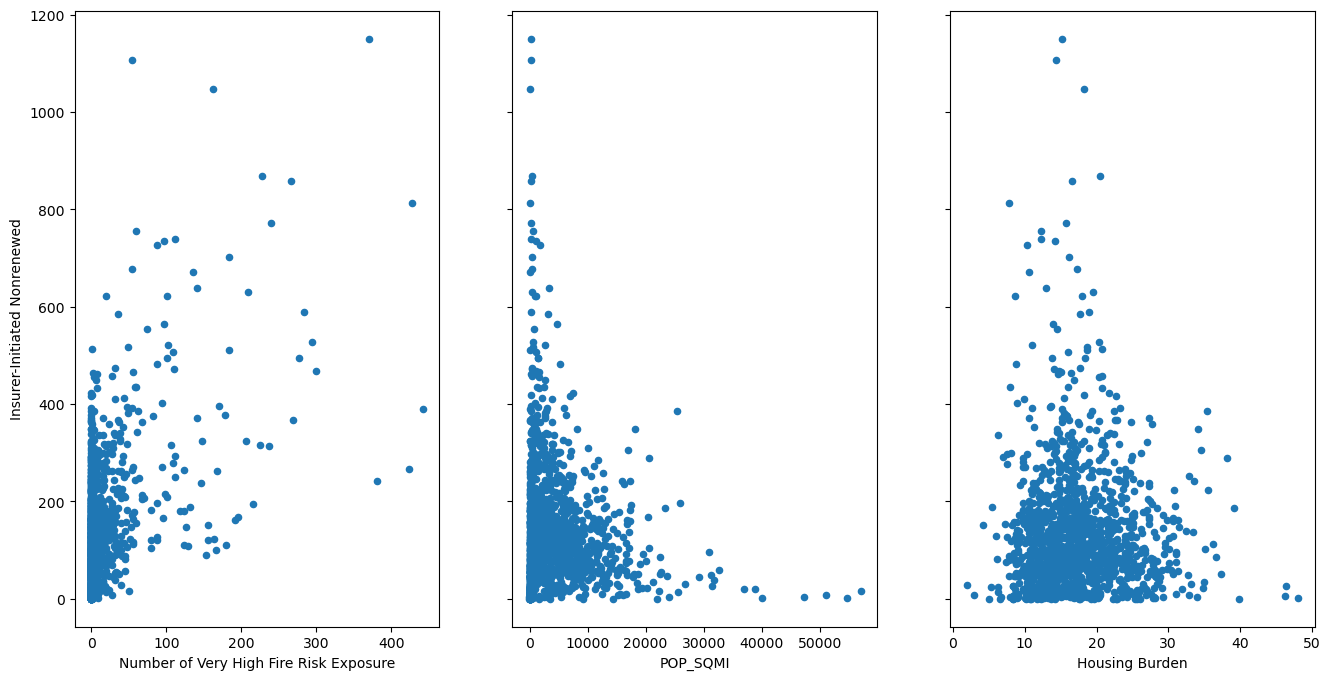

In [24]:
fig, ax = plt.subplots(1,3, sharey= True)

df.plot(kind= 'scatter', x = 'Number of Very High Fire Risk Exposure', y = 'Insurer-Initiated Nonrenewed',
        ax = ax[0], figsize=(16,8))
df.plot(kind= 'scatter', x = 'POP_SQMI', y = 'Insurer-Initiated Nonrenewed',
        ax = ax[1])
df.plot(kind= 'scatter', x = 'Housing Burden', y = 'Insurer-Initiated Nonrenewed',
        ax = ax[2])

Do you see any trends or correlations among the observations?

### Estimating Model Coefficients - Bivariate Correlations

</figure>
<img src="https://miro.medium.com/v2/resize:fit:2872/format:webp/1*k2bLmeYIG7z7dCyxADedhQ.png" alt="drawing" width="500" style="display: block; margin: 0 auto"/>

Bivariate regressions have two variables: the independent and dependent variable. This is the most simple form of regression that doesn't have any control variables, and will provide the y- intercept *(value of y when x =0)*, the $B$ coefficient, and the error term. As an exercise, let's try to run the regression for:
<br>
<p style="text-align: center;">$y= B_0 + B_1* Number of Exposure to High Risk Wildfires + e$</p>


In [25]:
## First let's rename some variables so they make more sense 

df= df.rename(columns = {
    'Number of Very High Fire Risk Exposure': 'Very_High', 
    'Avg Fire Risk Score': 'Avg_Risk',
    'Earned Premium': 'Earned_Prem',
    'Housing Burden': 'Hous_Burd',
    'Insurer-Initiated Nonrenewed' : 'Insurer_Nonrenewed',
    'Insured-Initiated Nonrenewed': 'Insured_Nonrenewed'
})

<Axes: xlabel='Ozone', ylabel='Insurer_Nonrenewed'>

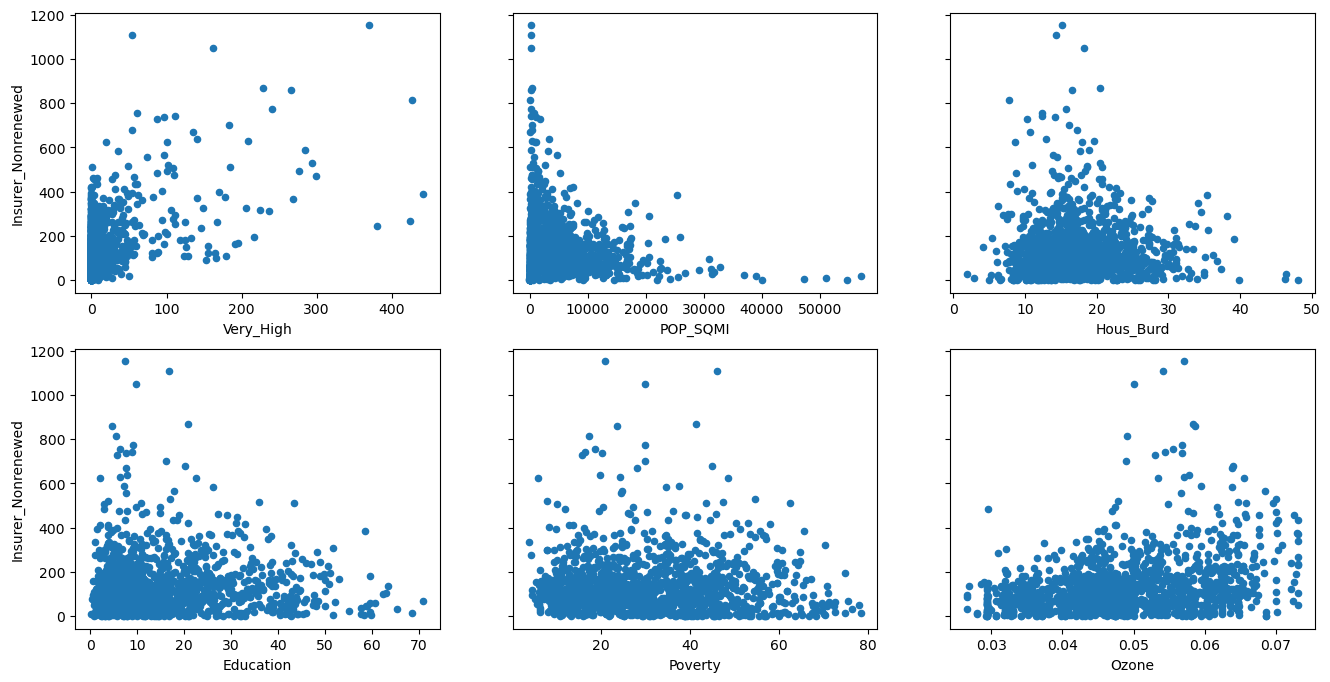

In [26]:
## can we graph some of these variables?

fig, axs = plt.subplots(2, 3, sharey=True)
df.plot(kind='scatter', x='Very_High', y='Insurer_Nonrenewed', ax=axs[0,0], figsize=(16, 8))
df.plot(kind='scatter', x='POP_SQMI', y='Insurer_Nonrenewed', ax=axs[0,1])
df.plot(kind='scatter', x='Hous_Burd', y='Insurer_Nonrenewed', ax=axs[0,2])
df.plot(kind='scatter', x='Education', y='Insurer_Nonrenewed', ax=axs[1,0])
df.plot(kind='scatter', x='Poverty', y='Insurer_Nonrenewed', ax=axs[1,1])
df.plot(kind='scatter', x='Ozone', y='Insurer_Nonrenewed', ax=axs[1,2])

For linear regressions, we use the package stats models. More information on the codes can be found here: **[Stats Model](https://www.statsmodels.org/stable/index.html)**

In [54]:
# this is the standard import if you're using formula notation 
import statsmodels.formula.api as smf

# print the fitted model in one line
lm = smf.ols(formula = 'Insurer_Nonrenewed ~ Avg_Risk', data= df). fit()

#print the coefficients
lm.params

Intercept    122.518372
Avg_Risk      19.264960
dtype: float64

In [55]:
# useful code to look at the summary statistics would be using the summary function

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Insurer_Nonrenewed   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.48
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           0.000724
Time:                        20:57:58   Log-Likelihood:                -8054.2
No. Observations:                1280   AIC:                         1.611e+04
Df Residuals:                    1278   BIC:                         1.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    122.5184      5.838     20.987      0.000     111.065     133.971
Avg_Risk      19.2650      5.685      3.388      0.001       8.111      30.419
==============================================================================
Omnibus:                      703.608   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6443.518
Skew:                           2.404   Prob(JB):                         0.00
Kurtosis:                      12.885   Cond. No.                         2.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation

For OLS regressions, the coefficient for the independent (explanatory) variables shows the slope, or the average effect of a 1 unit change on X in the change in y. In the regression result above, we can say that **for every 1 increase in the occurence of very high risk wild fires in the zip code, will on average, result in a 1.57 increase in occurences of insurance comapnies cancelling insurances. the results are statistically signficant in the 99% confidence interval**

In [29]:
## I want to see a correlation matrix so let me create a df that has only numeric values

df_corr= df[['Insured_Nonrenewed', 'Insurer_Nonrenewed', 'Earned_Prem', 'New', 'Renewed',
           'Number of Negligible Fire Risk Exposure','Number of Low Fire Risk Exposure',
           'Number of Moderate Fire Risk Exposure','Number of High Fire Risk Exposure', 'Very_High',
           'Education', 'Poverty', 'Unemployment', 'Hous_Burd','Linguistic Isolation', 'Ozone', 'PM2.5', 'Avg_Risk', 'POP_SQMI']]


In [30]:
## can we show the correlation matrix 

corr = df_corr.corr()
corr

,Insured_Nonrenewed,Insurer_Nonrenewed,Earned_Prem,New,Renewed,Number of Negligible Fire Risk Exposure,Number of Low Fire Risk Exposure,Number of Moderate Fire Risk Exposure,Number of High Fire Risk Exposure,Very_High,Education,Poverty,Unemployment,Hous_Burd,Linguistic Isolation,Ozone,PM2.5,Avg_Risk,POP_SQMI
Insured_Nonrenewed,1.000000,0.741901,0.747417,0.983790,0.939962,0.814574,0.842174,0.364147,0.138818,0.175568,-0.085470,-0.165235,-0.082804,-0.108576,-0.120659,0.209071,0.138102,-0.234210,-0.070421
Insurer_Nonrenewed,0.741901,1.000000,0.606345,0.810687,0.651207,0.397347,0.536736,0.600026,0.552927,0.526300,-0.008580,-0.036109,0.005143,-0.030893,-0.117527,0.307449,0.065340,0.094363,-0.131579
Earned_Prem,0.747417,0.606345,1.000000,0.734167,0.760921,0.579661,0.796543,0.598903,0.325664,0.301019,-0.318921,-0.460408,-0.283168,-0.279334,-0.225445,0.005757,0.051944,-0.019408,-0.085555
New,0.983790,0.810687,0.734167,1.000000,0.910736,0.772516,0.807575,0.399698,0.211477,0.257571,-0.056124,-0.132421,-0.059802,-0.092296,-0.112353,0.251913,0.140298,-0.192400,-0.089881
Renewed,0.939962,0.651207,0.760921,0.910736,1.000000,0.871698,0.893898,0.321325,0.075354,0.080088,-0.049938,-0.194945,-0.140776,-0.078446,-0.059455,0.083984,0.201590,-0.308179,0.025799
Number of Negligible Fire Risk Exposure,0.814574,0.397347,0.579661,0.772516,0.871698,1.000000,0.717581,-0.013854,-0.188847,-0.110233,0.053955,-0.111465,-0.071300,-0.068864,0.047450,0.078989,0.257571,-0.469895,0.052950
Number of Low Fire Risk Exposure,0.842174,0.536736,0.796543,0.807575,0.893898,0.717581,1.000000,0.365471,0.049931,0.032720,-0.190035,-0.310397,-0.194290,-0.219882,-0.157851,0.010247,0.101832,-0.227633,-0.069178
Number of Moderate Fire Risk Exposure,0.364147,0.600026,0.598903,0.399698,0.321325,-0.013854,0.365471,1.000000,0.647718,0.502751,-0.327750,-0.352143,-0.230710,-0.238032,-0.294109,-0.013161,-0.226098,0.386678,-0.227755
Number of High Fire Risk Exposure,0.138818,0.552927,0.325664,0.211477,0.075354,-0.188847,0.049931,0.647718,1.000000,0.758205,-0.235894,-0.187157,-0.123576,-0.153746,-0.248681,0.076607,-0.234771,0.571959,-0.206881
Very_High,0.175568,0.526300,0.301019,0.257571,0.080088,-0.110233,0.032720,0.502751,0.758205,1.000000,-0.186390,-0.142992,-0.067027,-0.136639,-0.212277,0.210876,-0.157103,0.489698,-0.192445


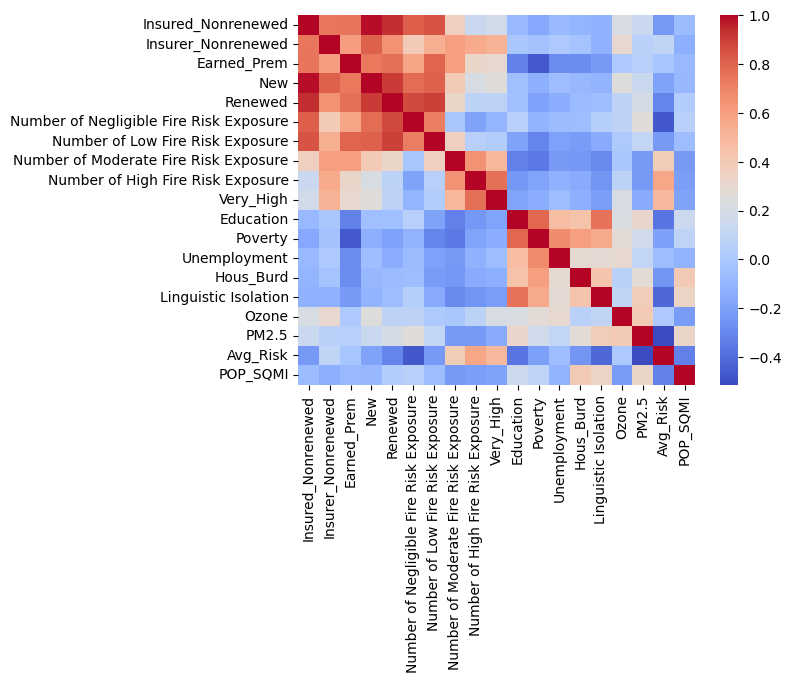

In [31]:
## what if we want to plot it?

corr_plot = sns.heatmap(df_corr.corr(), cmap = "coolwarm", annot = False)

Since the correlation is pretty low here, we should not be too worried. As a rule of thumb, anything about 0.6 or above, I will do Variance Inflation Factor tests, where we find
$$
VIF = \frac{1}{1-R_i^2}
$$
where $i$ is the independent variable in question and we regress it on all the other independent variables

As can be expected there is high correlation among *insurance renewals*, *fire risk*, and *socio-economic variables*. Although I don't use the variable *earned premium* in my regression, let's see what it would look like if we tested for ***vif***.

In [52]:
lm_vif = smf.ols(formula = 'Earned_Prem ~ Avg_Risk + POP_SQMI + Hous_Burd', data= df).fit()
print(1/(1-lm_vif.rsquared))

# if vif is above 4, reconsider which independent variables shows correlation

1.0942158037149916


A 1.18 VIF is considered pretty low, so I won't be too worried about my independent variables showing correlation.

### Predicting Values and Creating the Line of Best Fit

Our **line of best fit** is a linear line that uses the estimated coefficent(slope) and draws a line that minimizes the variance in the regression. The line is drawn with predictions that were made based on 

In [56]:
## let's make the prediction for x values and store them
Avg_Risk_Pred = pd.DataFrame({'Avg_Risk': [df.Avg_Risk.min(), df.Avg_Risk.max()]})
preds = lm.predict(Avg_Risk_Pred)
preds

0    122.518372
1    199.578213
dtype: float64

Text(0, 0.5, 'Insurer Initiated Nonrenewals')

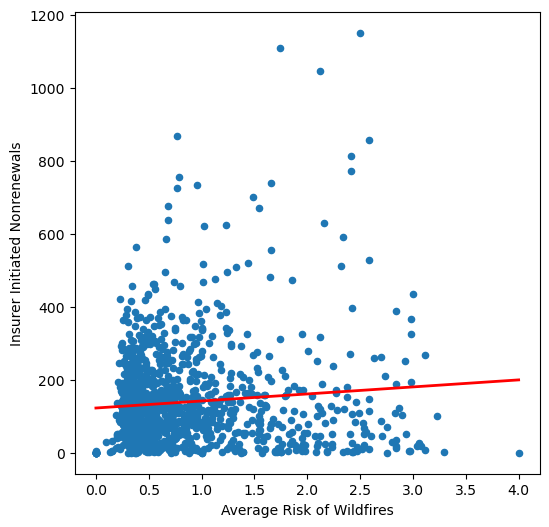

In [57]:
fig, ax = plt.subplots(figsize = (6,6))

df.plot(kind= 'scatter', x = 'Avg_Risk', y = 'Insurer_Nonrenewed', ax=ax)

plt.plot(Avg_Risk_Pred, preds, c='red', linewidth =2)

ax.set_xlabel("Average Risk of Wildfires")
ax.set_ylabel("Insurer Initiated Nonrenewals")

### Multivariate Regressions
</figure>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*pJsp76_deJvdDean" alt="drawing" width="600" style="display: block; margin: 0 auto"/>

For multivariate regressions, we can have multiple explanatory variables, and also control variables. Adding control variables will generally increase the R-squared, and mitigate omitted variable bias.


In [58]:
## Now let's try to run a multivariate regression
## I bring in the same three independent variables of interest and add a few controls related to race 

mvr = smf.ols(formula = 'Insurer_Nonrenewed ~ Avg_Risk + POP_SQMI + Hous_Burd + Education + Poverty', 
              data =df).fit()

## we bring out the parameters to take a look at the 
mvr.params

Intercept    125.010883
Avg_Risk      17.439173
POP_SQMI      -0.003142
Hous_Burd      2.001989
Education      1.427493
Poverty       -1.439131
dtype: float64

In [61]:
## what if we wanted to see the r-squared values?

mvr.rsquared

0.021444158688343262

In [62]:
## let's bring out the summary table again

mvr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Insurer_Nonrenewed   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.584
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           4.26e-05
Time:                        20:58:56   Log-Likelihood:                -8046.1
No. Observations:                1280   AIC:                         1.610e+04
Df Residuals:                    1274   BIC:                         1.614e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.6425     15.265      6.659      0.000      71.696     131.589
Avg_Risk      34.1175      7.024      4.857      0.000      20.337      47.898
urban         29.6828      9.462      3.137      0.002      11.121      48.245
Hous_Burd     -0.7684      0.858     -0.895      0.371      -2.452       0.915
Education      1.2152      0.495      2.453      0.014       0.243       2.187
Poverty       -0.4823      0.465     -1.036      0.300      -1.396       0.431
==============================================================================
Omnibus:                      725.228   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7070.288
Skew:                           2.476   Prob(JB):                         0.00
Kurtosis:                      13.394   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### In-Class Exercise (Interpret the Results from above)
What can we say about the correlation between the explanatory and response variable? What can we say about significance? How high is the r-squared? 

In [38]:
## write your answer here 

### What if we were working with categorical variables? Or wanted to create a binary variable? 

The U.S. Census Bureau defines urban areas as a core with a population density of 1,000 persons per square miles. Let's create a new column that says 'urban' and make it a dummy variable and encode urban as 1 and rural as 0.

In [39]:
df['urban'] = 1*(df['POP_SQMI']>1000)
df[['urban']]

,urban
0,1
1,1
2,1
3,1
4,1
...,...
1275,0
1276,0
1277,0
1278,0


In [59]:
## let's create another multi-variate regression with urban areas instead of POP_SQMI 

mvr = smf.ols(formula = 'Insurer_Nonrenewed ~ Avg_Risk + urban + Hous_Burd + Education + Poverty', 
              data =df).fit()

## show the parameters

mvr.params

Intercept    101.642533
Avg_Risk      34.117549
urban         29.682844
Hous_Burd     -0.768368
Education      1.215235
Poverty       -0.482331
dtype: float64

In [41]:
## what would the summary table look like?

mvr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Insurer_Nonrenewed   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     114.2
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          7.17e-100
Time:                        10:49:04   Log-Likelihood:                -7822.9
No. Observations:                1280   AIC:                         1.566e+04
Df Residuals:                    1274   BIC:                         1.569e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.1611     10.255      8.012      0.000      62.042     102.280
Very_High      1.7214      0.072     23.770      0.000       1.579       1.864
urban         44.8602      7.260      6.179      0.000      30.617      59.103
Hous_Burd     -1.0891      0.721     -1.511      0.131      -2.503       0.325
Education      1.2852      0.396      3.249      0.001       0.509       2.061
Poverty        0.0279      0.391      0.071      0.943      -0.739       0.795
==============================================================================
Omnibus:                      502.560   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4142.483
Skew:                           1.597   Prob(JB):                         0.00
Kurtosis:                      11.214   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
## How do you interpret the urban areas variable? 

## In urban areas, compared to rural areas, there are, on average, 45 times more insurance-company initiated cancellations for wildfire protection. 

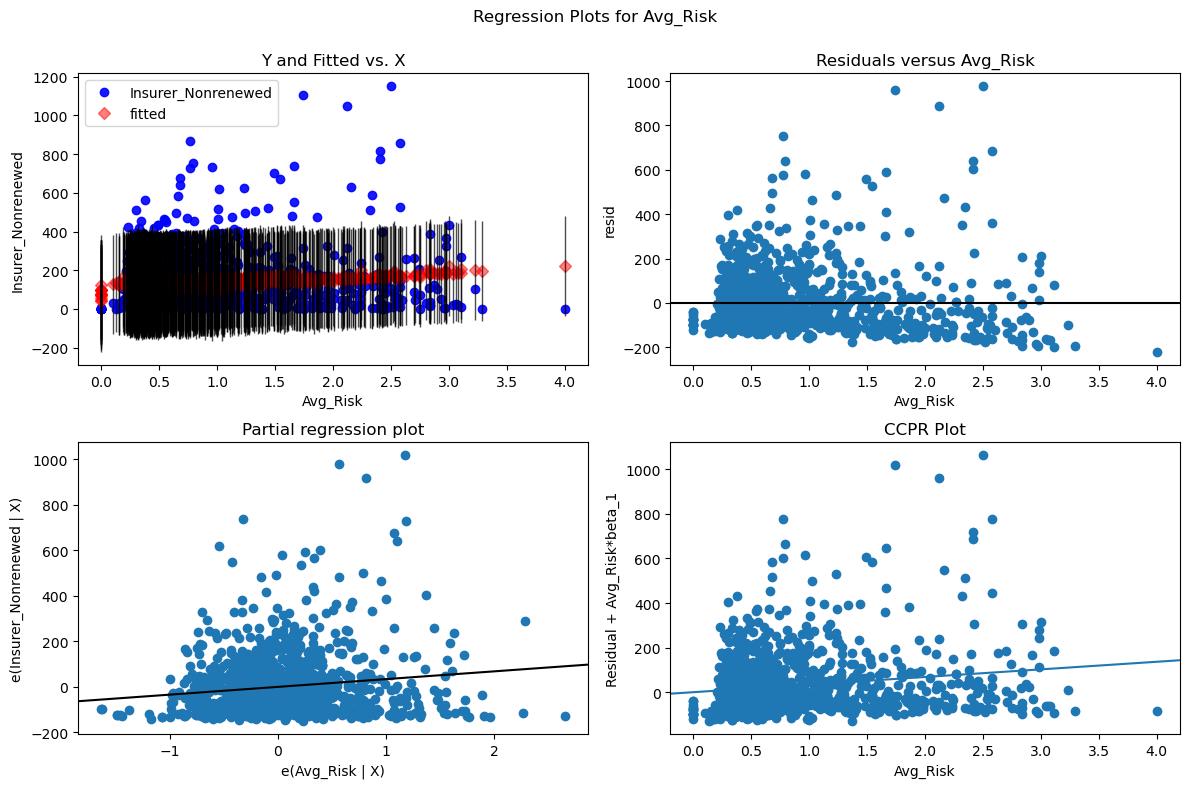

In [60]:
## can we plot the residuals?

import statsmodels.api as sm 

fig = plt.figure(figsize =(12,8))
fig = sm.graphics.plot_regress_exog(mvr, 'Avg_Risk', fig=fig)

## Interaction Terms 

Sometimes we want to observe the correlation of insurance companies pulling out by urbanicity and vulnerability to wildfire. In those cases, we use interaction terms which is essentially multiplying the two variables together. 

It would look like:
$y = B_0 + B_1 * (urban) + B_2 * (average fire risk) + B_3 * (urban) * (average fire risk) + u$

In [63]:
## In order to operationalize the interaction term, we need create a new column with the interacted variable 

df['urban_avg'] = df['urban'] * df['Avg_Risk']

df[['urban_avg']]

,urban_avg
0,0.35
1,0.35
2,0.34
3,0.55
4,0.51
...,...
1275,0.00
1276,0.00
1277,0.00
1278,0.00


In [64]:
## let's run the regression again with the interaction term this time

mvr = smf.ols(formula = 'Insurer_Nonrenewed ~ Avg_Risk + urban + urban_avg + Hous_Burd + Education + Poverty', 
              data =df).fit()

## show the parameters

mvr.params

Intercept    102.915319
Avg_Risk      28.042367
urban          4.246983
urban_avg     38.286057
Hous_Burd     -0.594044
Education      1.233646
Poverty       -0.402840
dtype: float64

In [65]:
mvr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Insurer_Nonrenewed   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.553
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           1.08e-05
Time:                        22:12:28   Log-Likelihood:                -8043.4
No. Observations:                1280   AIC:                         1.610e+04
Df Residuals:                    1273   BIC:                         1.614e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.9153     15.249      6.749      0.000      72.999     132.831
Avg_Risk      28.0424      7.492      3.743      0.000      13.344      42.740
urban          4.2470     14.532      0.292      0.770     -24.263      32.757
urban_avg     38.2861     16.623      2.303      0.021       5.675      70.897
Hous_Burd     -0.5940      0.860     -0.691      0.490      -2.281       1.093
Education      1.2336      0.495      2.494      0.013       0.263       2.204
Poverty       -0.4028      0.466     -0.864      0.387      -1.317       0.511
==============================================================================
Omnibus:                      732.650   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7395.207
Skew:                           2.496   Prob(JB):                         0.00
Kurtosis:                      13.665   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
## How would you interpret the interaction terms for the urban * average fire risk ?
